1. (3 pts) Predict probability of admission using Logistic Regression
Please download ex2data1file.
You will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant’s
chance of admission based on their results on two exams. You have historical data from previous applicants that
you can use as a training data for logistic regression. For each training example, you have the applicant’s scores
on two exams and the admissions decision. Your task is to build a classification model that estimates an
applicant’s probability of admission based on the scores from those two exams.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Mining /Assignment_3/ex2data1.txt',sep = ',')

In [ ]:
#defining the columns
df.columns = ['exam1','exam2','label']


In [ ]:
df.describe()

,exam1,exam2,label
count,99.000000,99.000000,99.000000
mean,65.957614,66.102779,0.606061
std,19.302009,18.638875,0.491108
min,30.058822,30.603263,0.000000
25%,51.297736,47.978125,0.000000
50%,67.319257,66.589353,1.000000
75%,80.234877,79.876423,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
df.isnull().any()

exam1    False
exam2    False
label    False
dtype: bool

1-1. Visualize the data
Before starting to implement any machine learning algorithm, it is good to visualize the data if possible. Please
display a figure like below, where the axes are the two exam scores, and the positive and negative examples are
shown with different markers.

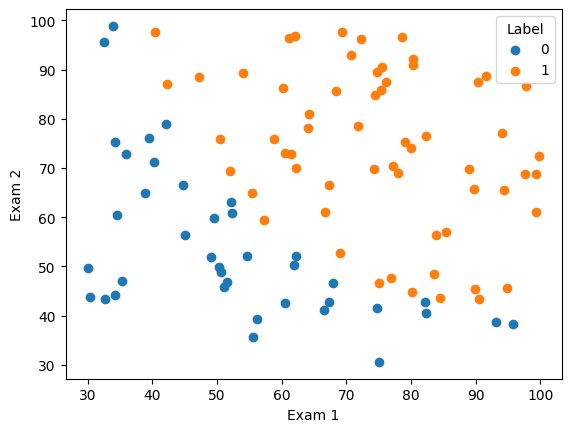

In [ ]:
#plot the exam1 and exam2 data points
fig, ax = plt.subplots()
for label, group in df.groupby('label'):
    ax.scatter(group['exam1'], group['exam2'], label=label)

ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')
ax.legend(title='Label')
plt.show()

In [ ]:
#Split the data 
X = df[['exam1','exam2']].values
y=df['label'].values

In [ ]:
#Normalize the data

def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm

X_norm = normalize_data(X)

In [ ]:
#column of ones for the bias term
X_norm = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

In [ ]:
#Define Parameters
alpha = 0.01
num_iters = 13000
theta = np.zeros(X_norm.shape[1])

1-2. Fit the data using a logistic regression by implementing gradient descent.
You need to calculate cost function (binary cross-entropy) of logistic regression and update the weight.

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cost_function(X_norm, y, theta):
    m = len(y)
    h = sigmoid(X_norm @ theta)
    epsilon = 1e-8
    return (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()

def gradient_descent(X_norm, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        h = sigmoid(X_norm @ theta)
        gradient = (1 / m) * X_norm.T @ (h - y)
        theta = theta - alpha * gradient
        J_history[i] = cost_function(X_norm, y, theta)
    
    return theta, J_history

theta, J_history = gradient_descent(X_norm, y, theta, alpha, num_iters)

print("Optimized theta:", theta)
print("Final cost:", J_history[-1])

Optimized theta: [1.40986676 3.18714692 3.00713977]
Final cost: 0.20851722171252482


1-3. Evaluate logistic regression
After learning the weights, you can use the model to predict whether a particular student will be admitted. For a
student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.77 – 0.78. Please verify your model this.
Another way to evaluate the quality of the model is to draw the decision boundary on the data. Please visualize
the decision boundary like below.

In [ ]:
exam1_score = 45
exam2_score = 85
X_test = np.array([exam1_score, exam2_score])

In [ ]:
X_test_norm = normalize_data(X_test)
X_test_norm = np.hstack([np.ones(1), X_test_norm])

In [ ]:
prob = sigmoid(np.dot(X_test_norm, theta))
print("Admission probability:", prob)

Admission probability: 0.7737940033518996


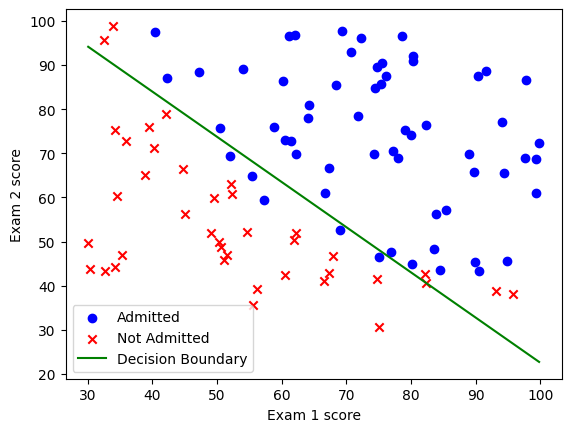

In [ ]:
import matplotlib.pyplot as plt

# Calculate mean and std
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Scatter plot
pos = y == 1
neg = y == 0

plt.scatter(X[pos, 0], X[pos, 1], c='blue', marker='o', label='Admitted')
plt.scatter(X[neg, 0], X[neg, 1], c='red', marker='x', label='Not Admitted')

# Decision boundary
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values_norm = (- (theta[0] + theta[1] * (x_values - mean[0]) / std[0]) / theta[2])

# Apply inverse transformation to y_values_norm
y_values = y_values_norm * std[1] + mean[1]

plt.plot(x_values, y_values, label='Decision Boundary', c='green')

# Plot settings
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')

plt.show()
